In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# Set seed for reproducibility
np.random.seed(42)

# Generate 2000 samples
n_samples = 2000

# Create base DataFrame
data = {
    'ID': range(1, n_samples+1),
    'Age': np.random.randint(15, 45, n_samples),
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'Screen Time (min/day)': np.zeros(n_samples),
    'Game as Hobby': np.zeros(n_samples, dtype=object),
    'Gaming Dedicated Platform': np.zeros(n_samples, dtype=object),
    'Money Spent ($)': np.zeros(n_samples),
    'Gamer Type': np.zeros(n_samples, dtype=object)
}

df = pd.DataFrame(data)

# Generate target-driven features
for i in range(n_samples):
    # Force strong patterns for 80% of data
    if i < int(n_samples*0.7):
        if np.random.rand() < 0.5:  # Hardcore pattern
            df.at[i, 'Screen Time (min/day)'] = np.random.randint(180, 601)
            df.at[i, 'Game as Hobby'] = 'Yes'
            df.at[i, 'Gaming Dedicated Platform'] = 'Yes'
            df.at[i, 'Money Spent ($)'] = np.random.randint(150, 501)
            df.at[i, 'Gamer Type'] = 'Hardcore'
            # Adjust age distribution
            df.at[i, 'Age'] = np.random.randint(15, 36)
        else:  # Casual pattern
            df.at[i, 'Screen Time (min/day)'] = np.random.randint(30, 151)
            df.at[i, 'Game as Hobby'] = 'No' if np.random.rand() < 0.8 else 'Yes'
            df.at[i, 'Gaming Dedicated Platform'] = 'No' if np.random.rand() < 0.85 else 'Yes'
            df.at[i, 'Money Spent ($)'] = np.random.randint(0, 101)
            df.at[i, 'Gamer Type'] = 'Casual'
    else:  # 20% noisy data
        if np.random.rand() < 0.5:
            df.at[i, 'Gamer Type'] = 'Hardcore'
            df.at[i, 'Screen Time (min/day)'] = np.random.randint(150, 601)
            df.at[i, 'Game as Hobby'] = 'Yes' if np.random.rand() < 0.9 else 'No'
            df.at[i, 'Gaming Dedicated Platform'] = 'Yes' if np.random.rand() < 0.9 else 'No'
            df.at[i, 'Money Spent ($)'] = np.random.randint(100, 501)
        else:
            df.at[i, 'Gamer Type'] = 'Casual'
            df.at[i, 'Screen Time (min/day)'] = np.random.randint(30, 200)
            df.at[i, 'Game as Hobby'] = 'No' if np.random.rand() < 0.7 else 'Yes'
            df.at[i, 'Gaming Dedicated Platform'] = 'No' if np.random.rand() < 0.8 else 'Yes'
            df.at[i, 'Money Spent ($)'] = np.random.randint(0, 150)

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Save to CSV
df.to_csv('gamer_classification.csv', index=False)

In [45]:
df = pd.read_csv('gamer_classification.csv')
df.head()

,ID,Age,Gender,Screen Time (min/day),Game as Hobby,Gaming Dedicated Platform,Money Spent ($),Gamer Type
0,1141,35,Male,559.0,Yes,Yes,348.0,Hardcore
1,170,41,Male,31.0,No,No,9.0,Casual
2,188,40,Male,133.0,Yes,No,74.0,Casual
3,159,30,Male,220.0,Yes,Yes,452.0,Hardcore
4,1389,30,Male,445.0,Yes,Yes,159.0,Hardcore


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2000 non-null   int64  
 1   Age                        2000 non-null   int64  
 2   Gender                     2000 non-null   object 
 3   Screen Time (min/day)      2000 non-null   float64
 4   Game as Hobby              2000 non-null   object 
 5   Gaming Dedicated Platform  2000 non-null   object 
 6   Money Spent ($)            2000 non-null   float64
 7   Gamer Type                 2000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 125.1+ KB


In [47]:
df.describe()

,ID,Age,Screen Time (min/day),Money Spent ($)
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,27.767500,242.258500,187.023000
std,577.494589,8.100756,170.792329,152.740143
min,1.000000,15.000000,30.000000,0.000000
25%,500.750000,21.000000,94.000000,53.000000
50%,1000.500000,27.000000,187.000000,145.000000
75%,1500.250000,34.000000,386.000000,316.000000
max,2000.000000,44.000000,600.000000,500.000000


In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df = df.drop(columns='ID')

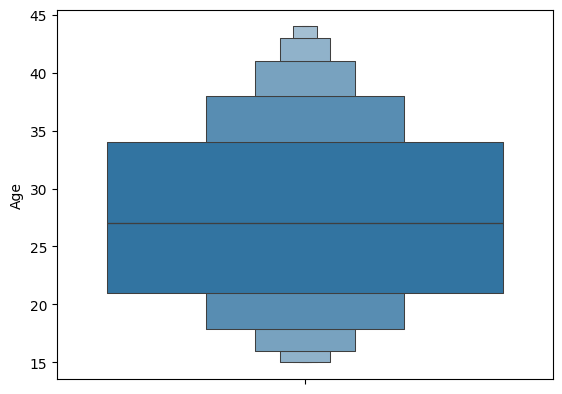

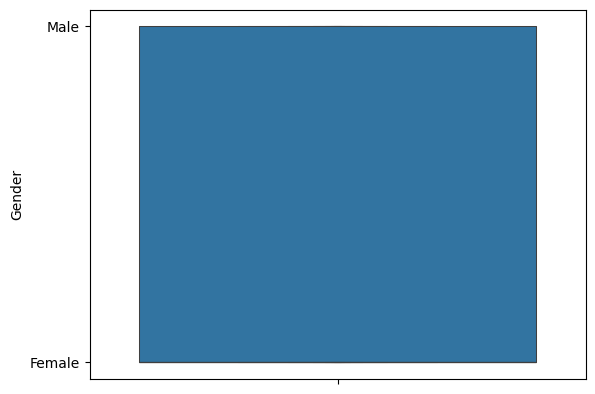

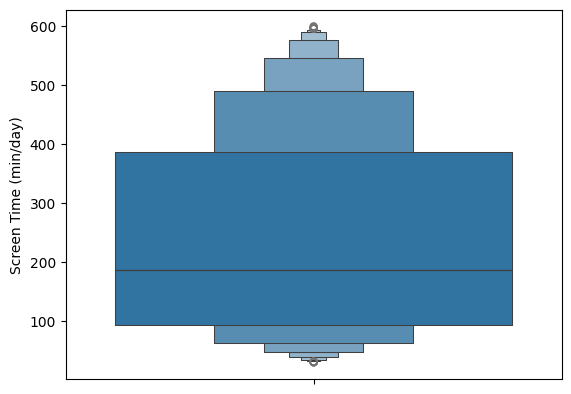

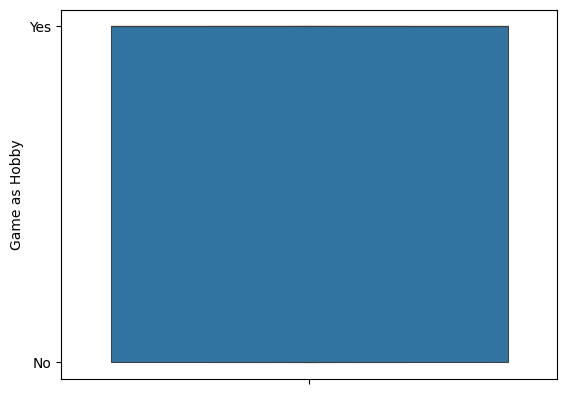

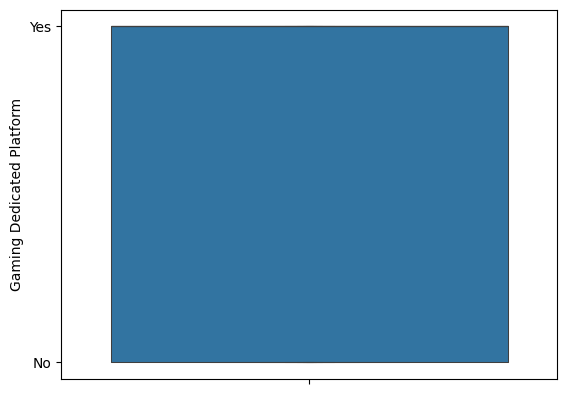

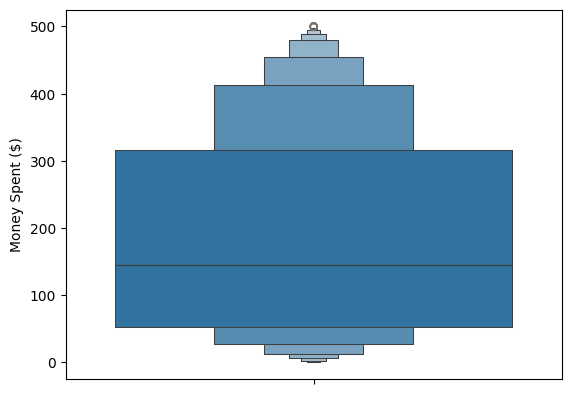

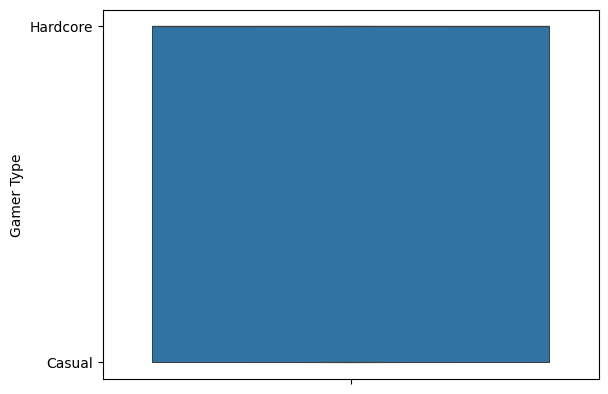

In [50]:
for col in df.columns:
    sns.boxenplot(df[col])
    plt.show()

In [51]:
cat_col = df.select_dtypes(include='object')

mapping = {}
for col in cat_col:
    unique = cat_col[col].unique()
    unique_label = {label : idx for idx, label in enumerate(unique)}
    mapping[col] = unique_label
    df[col] = cat_col[col].map(unique_label)

In [52]:
mapping

{'Gender': {'Male': 0, 'Female': 1},
 'Game as Hobby': {'Yes': 0, 'No': 1},
 'Gaming Dedicated Platform': {'Yes': 0, 'No': 1},
 'Gamer Type': {'Hardcore': 0, 'Casual': 1}}

In [53]:
df.head()

,Age,Gender,Screen Time (min/day),Game as Hobby,Gaming Dedicated Platform,Money Spent ($),Gamer Type
0,35,0,559.0,0,0,348.0,0
1,41,0,31.0,1,1,9.0,1
2,40,0,133.0,0,1,74.0,1
3,30,0,220.0,0,0,452.0,0
4,30,0,445.0,0,0,159.0,0


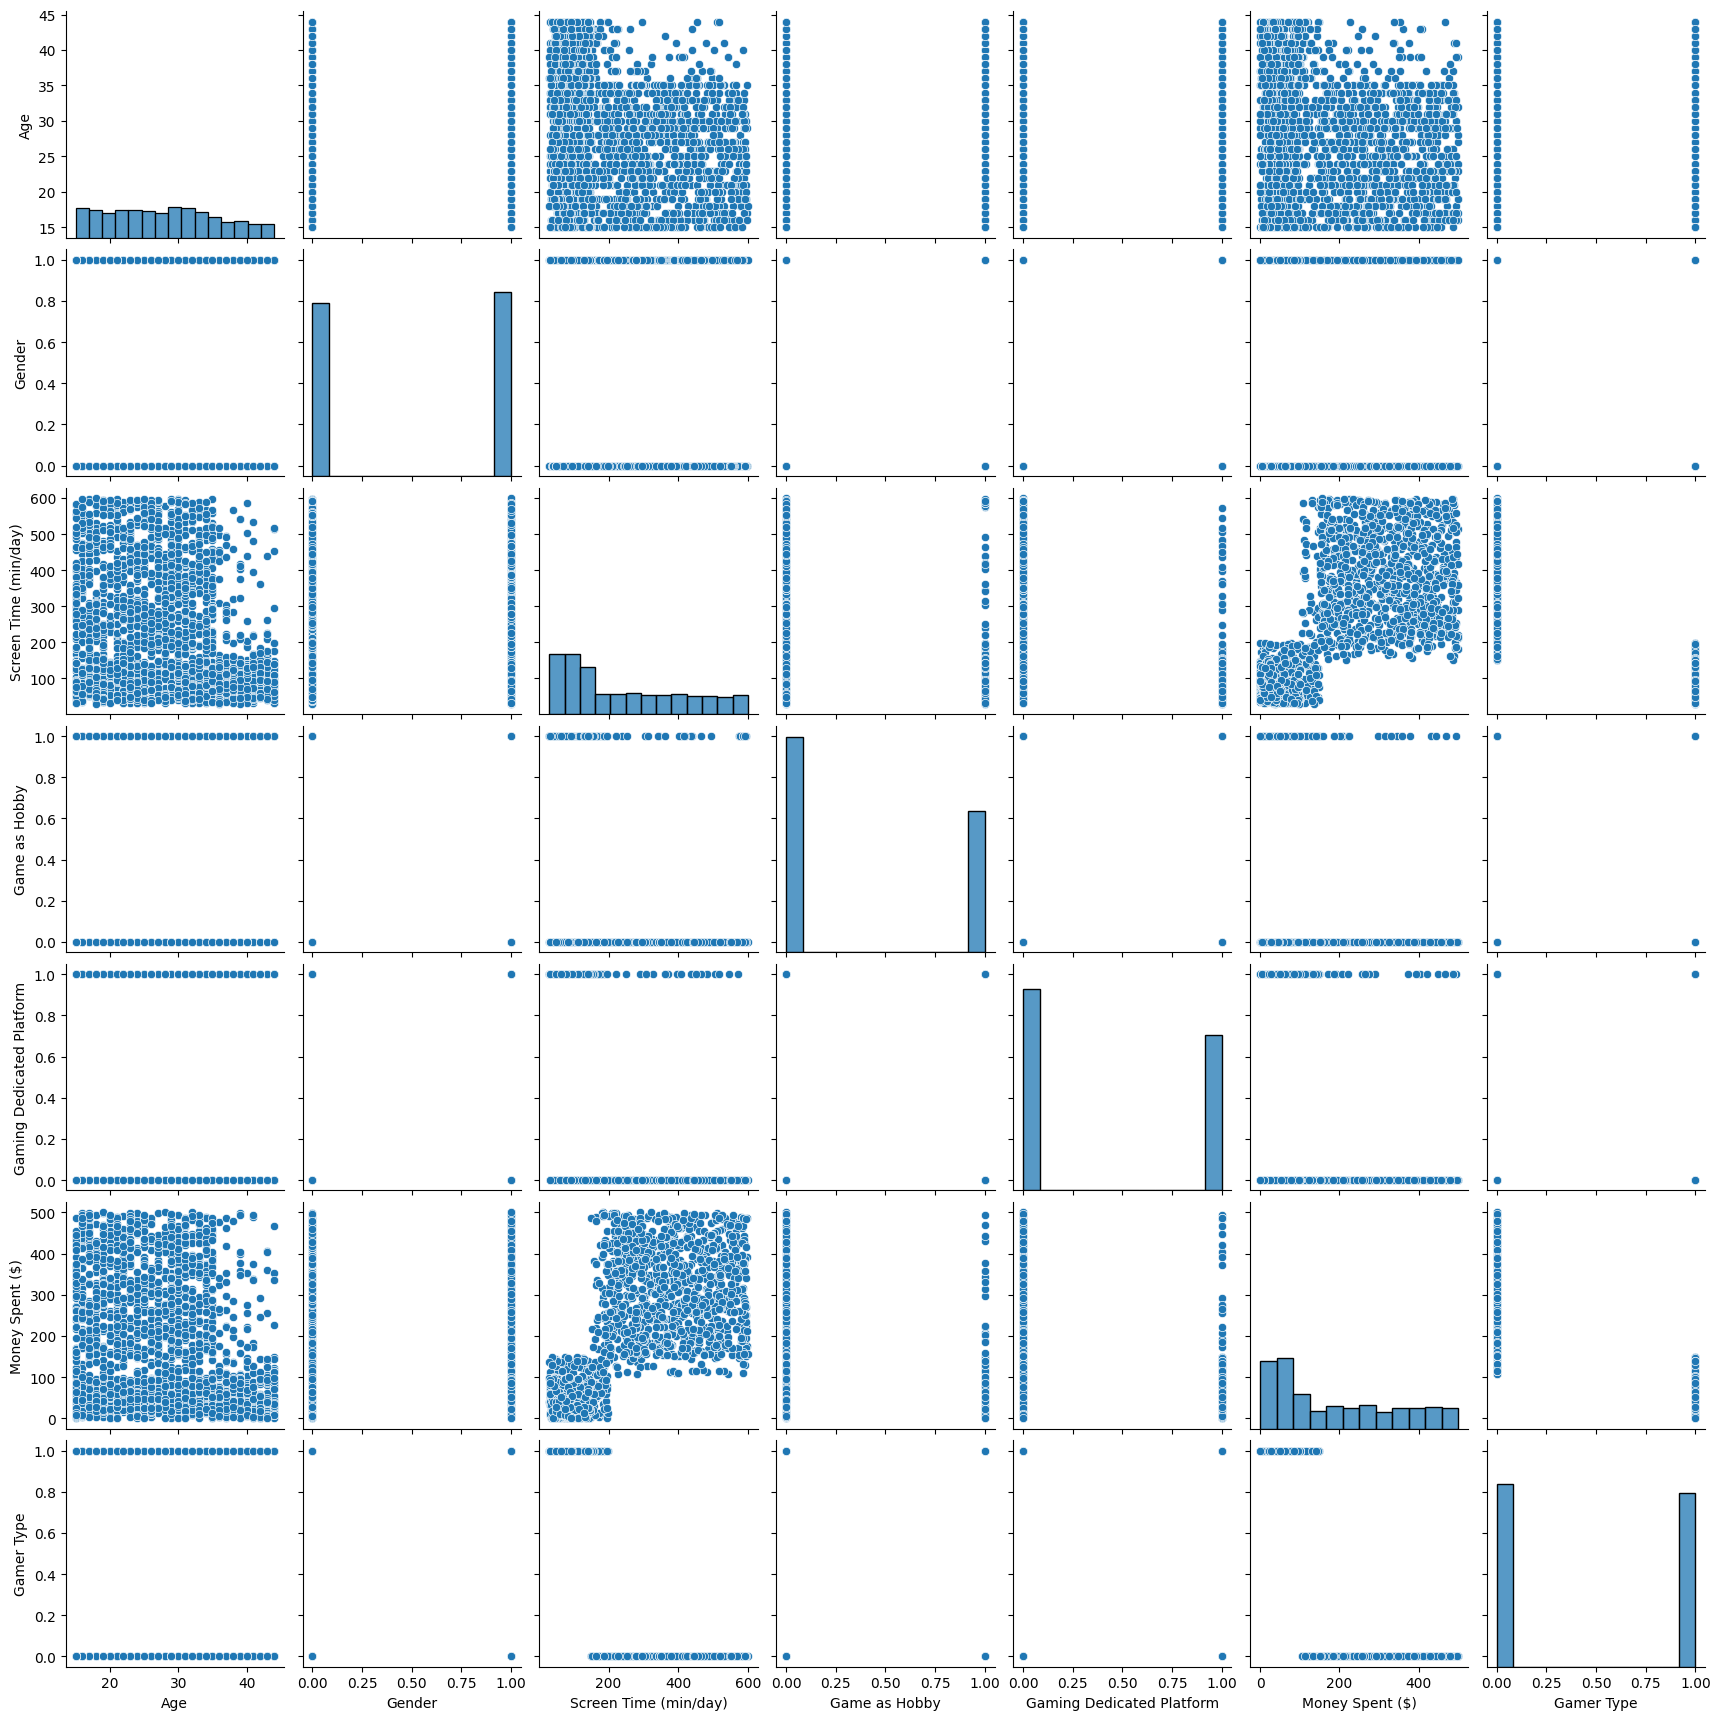

In [54]:
sns.pairplot(df)
plt.show()

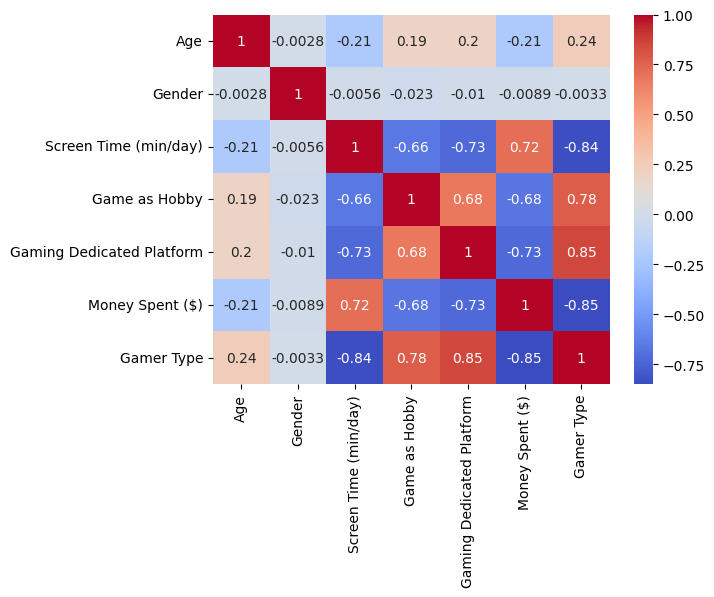

In [55]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [57]:
df['Gamer Type'].value_counts()

Gamer Type
0    1025
1     975
Name: count, dtype: int64

In [58]:
x = df.drop(columns='Gamer Type')
y = df['Gamer Type']

In [64]:
def strat(x,y,train_size = 0.8):
    np.random.seed(42)
    yidx = {}
    for i,label in enumerate(y):
        if label not in yidx:
            yidx[label] = [i]
        else:
            yidx[label].append(i)
            
    tr_idx = []
    te_idx = []
    
    for i,label in yidx.items():
        shuffle = np.random.permutation(label)
        train = max(1, int(len(shuffle) * train_size))
        tr_idx.extend(shuffle[:train])
        te_idx.extend(shuffle[train:])
        
    xtr = x.iloc[tr_idx].reset_index(drop=True)
    xte = x.iloc[te_idx].reset_index(drop=True)
    ytr = y.iloc[tr_idx].reset_index(drop=True)
    yte = y.iloc[te_idx].reset_index(drop=True)
    return xtr,xte,ytr,yte

In [65]:
xtr,xte,ytr,yte = strat(x,y,train_size=0.8)

In [67]:
print(xtr.shape)
print(xte.shape)
print(ytr.shape)
print(yte.shape)

(1600, 6)
(400, 6)
(1600,)
(400,)
